# HW 4 More Wine 

Due Sunday 2019.10.07 Sunday by 11:59pm 

Ron Neely, Rowan Data Mining 2 @ LMCO Due 2018.10.07

Homework: See Slide 7 in PPT 4b - More Bagging etc.
Note no need for a challenge question.  The rubric is given in the slide.
Build a better classifier than the default one discussed here.
Modifying hidden nodes will not vastly improve it and cause it to correctly predict 3, 4, 8, 9.

You should not need boosting

I have some ideas but use your own as well

Manipulate the training data to reduce the number of 5,6,7 and increase the number of 3,4,8,9.  You can actually add duplicate records to train a classifier

Do the model in multiple stages.  Predict Good wines and bad wines, then among the good try to predict 6,7,8,9 and among the bad try to predict 3, 4, 5

Somehow combine a tree or forest with an SVM or NN to either do method A or something else

Think up another bright idea

I don’t know if any of these will work.  (I could never give this problem to an undergraduate class, because there is no linear path from problem to solution.  You may try things that don’t work; that’s research)

Best 5 solutions get a 10.  All reasonable attempts delivered on time get at least a 9.  Try something novel and get a 10 even if it doesn’t perform very well

You may work with someone else. (Your submission should include code, an output and a word document explaining your method)


In [1]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

import sys
print(sys.version)
!pwd
!ls *.csv

3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
/c/Users/AFMS/r/rn/rw/dm2/hw/04
winequality-red.csv
winequality-white.csv


## 1. Read data in to a pandas DataFrame and normalize

In [2]:
## The inclass dataset is different from the standard wine dataset included with sklearn.
# def sklearn_to_yX(sklearn_dataset, scaler = None):
#     X = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
#     y = pd.Series(sklearn_dataset.target)
#     if scaler:
#         X[X.columns] = scaler.fit_transform(X[X.columns])
#     return y, X
#
# y, X = sklearn_to_yX(datasets.load_wine(), StandardScaler())

## Load the in-class datasets from disk and normalize them into one dataframe.
def load_yX(filename, sep=';'):
    df = pd.read_csv(filename, sep=sep)
    y = df.iloc[:,-1]
    X = df.iloc[:,0:-1]
    return y, X

def peekprint_yX(y, X, head_count=3):
    print("Has any Nan: {}".format(y.isnull().values.any() or y.isnull().values.any()))
    print("y:{} {}; X:{}".format(y.shape, y.dtypes, X.shape))
    print(X.dtypes)
    #print("y: " , y.head(head_count))
    display(y.head(head_count))
    display(X.head(head_count))

yr, Xr = load_yX("winequality-red.csv")
Xr['red']=1
yw, Xw = load_yX("winequality-white.csv")
Xw['red']=0
y = pd.concat([yr, yw])
X = pd.concat([Xr, Xw])
scaler = StandardScaler()
X[X.columns[0:-1]] = scaler.fit_transform(X[X.columns[0:-1]])
peekprint_yX(y, X)

Has any Nan: False
y:(9796,) int64; X:(9796, 12)
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
red                       int64
dtype: object


0    6
1    6
2    6
Name: quality, dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,1
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,1
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,1


Make a draftsman's plot do see the dataset.

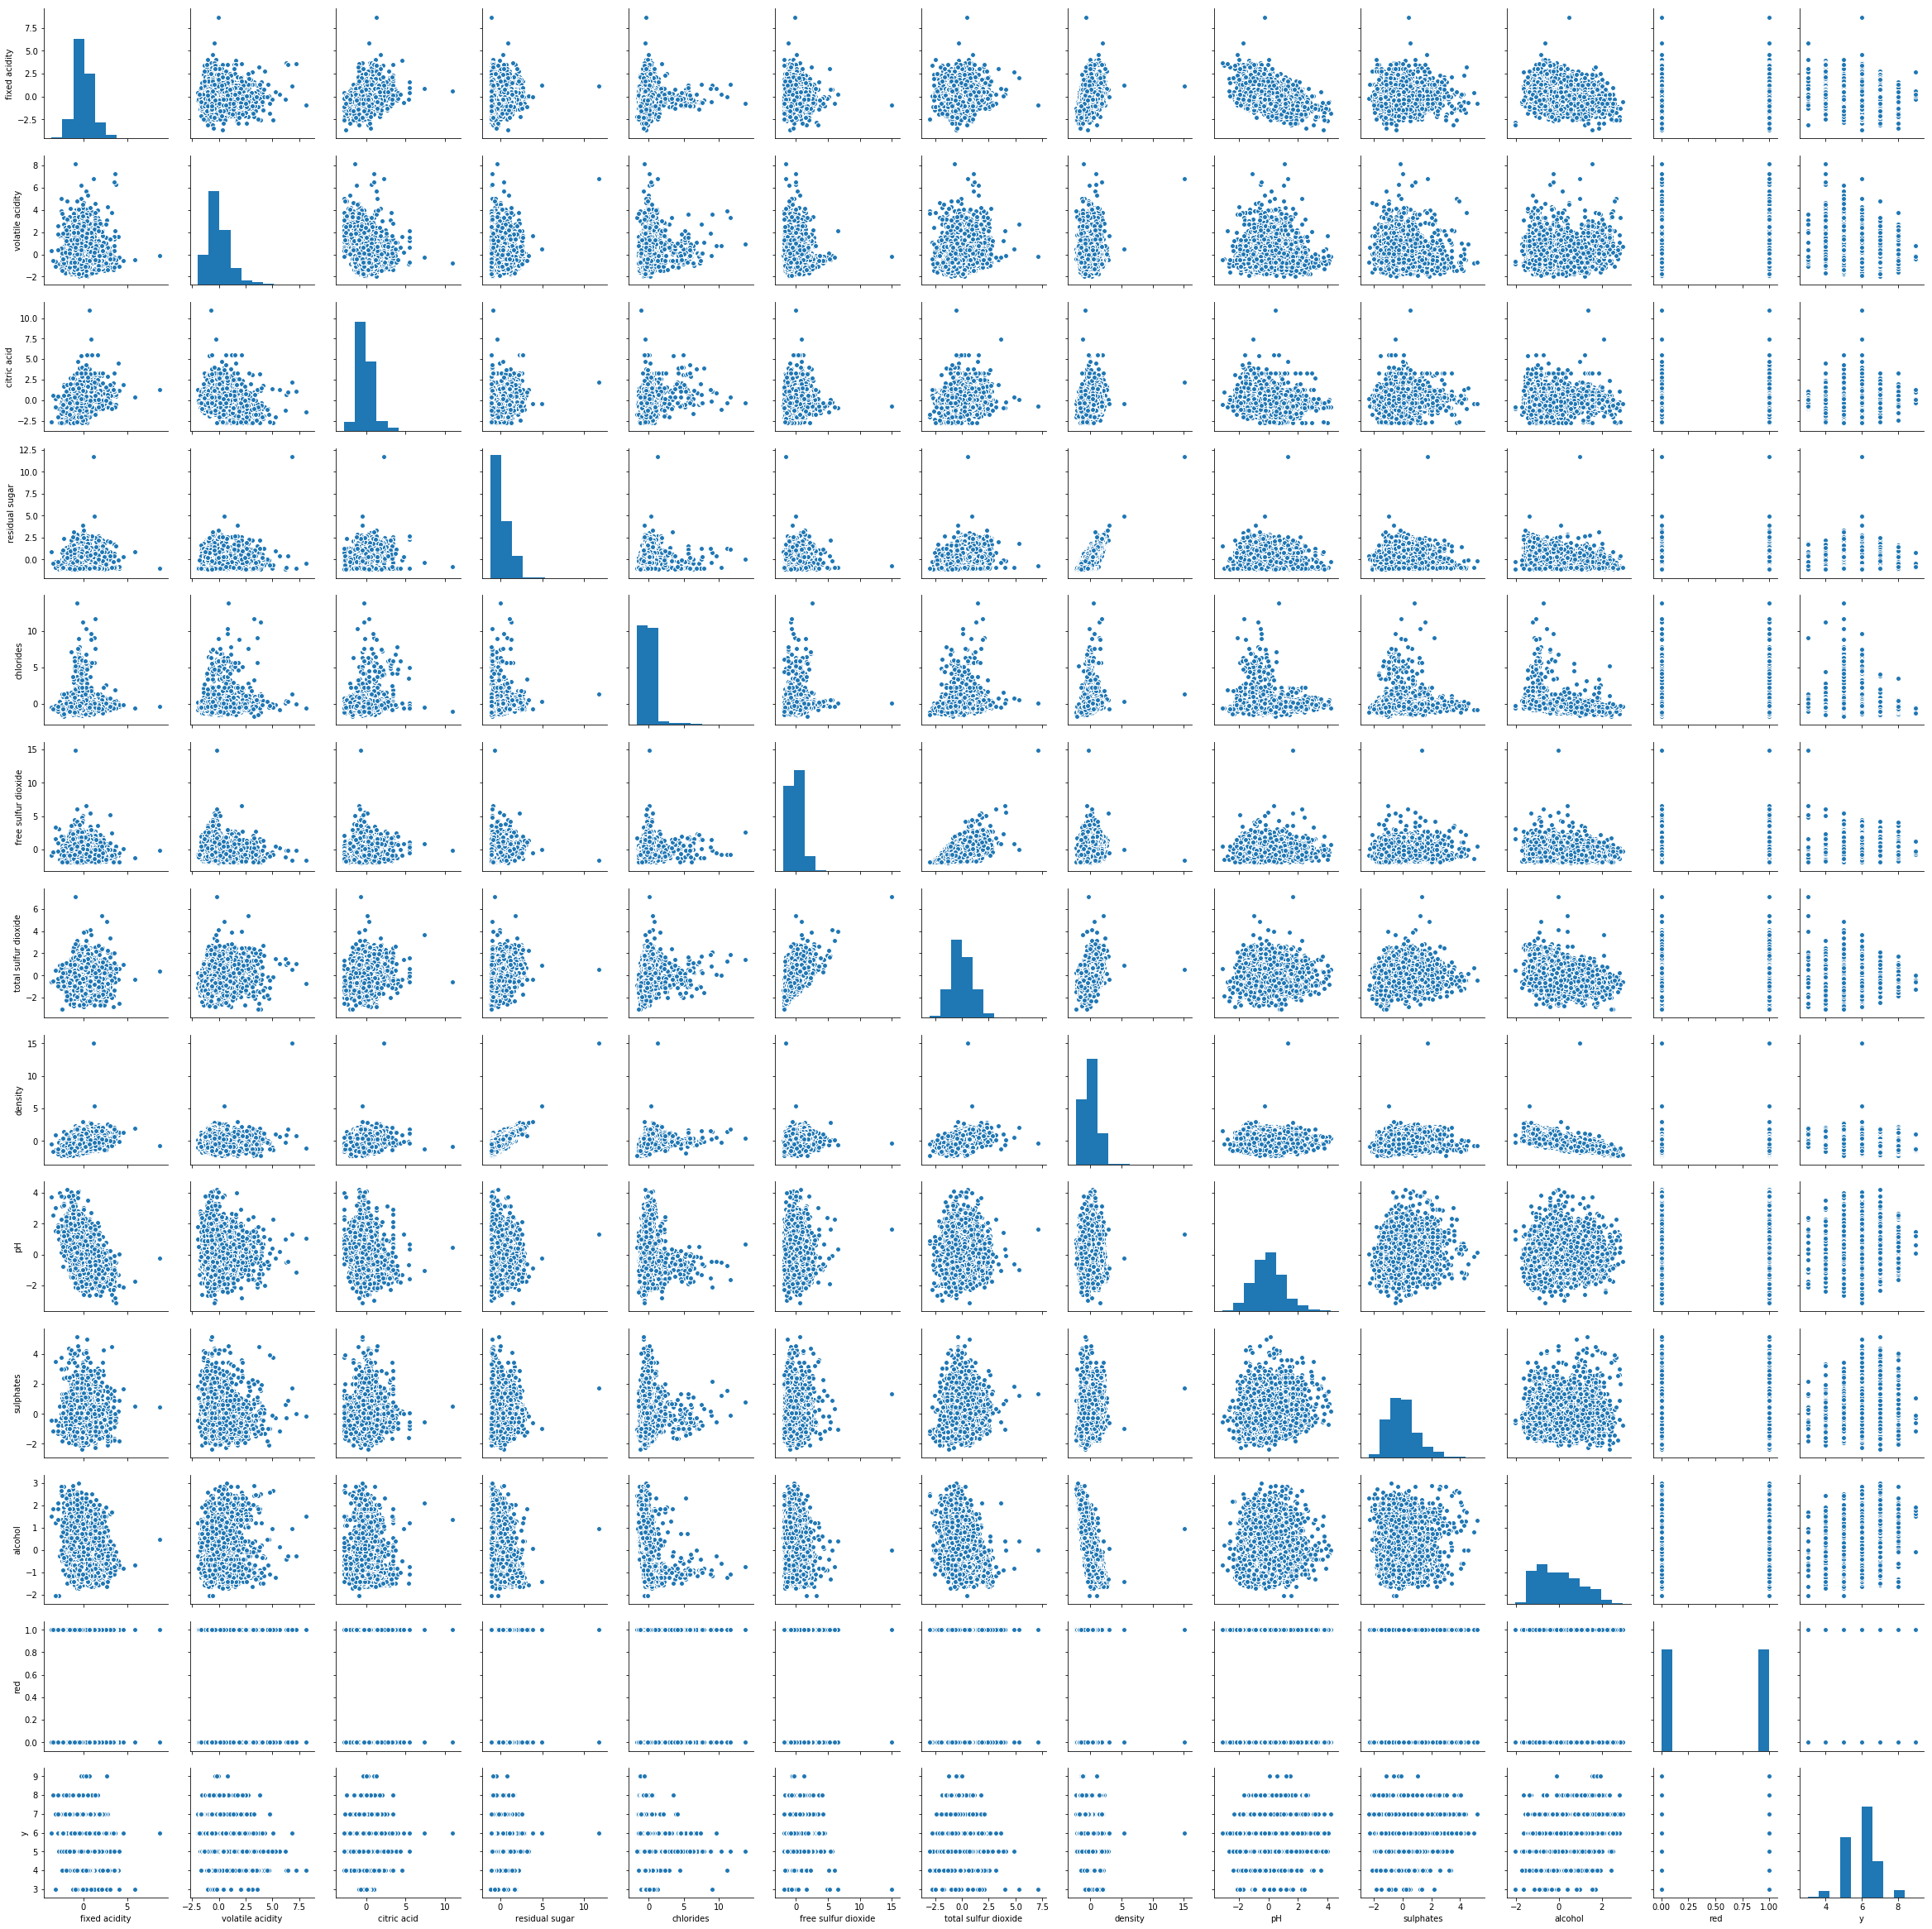

In [3]:
df = X.copy()
df['y']=y
g = sns.pairplot(df)
g.savefig("wine_pairs.png")

Densitiy looks proportional to residual sugar inversely proportional to alcohol.  
Quality ranges from 3 to 9 on a scale of 1 to 10 with very few 3's or 9's.

## 2. Create a baseline model.  

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.shape[0]/(y_train.shape[0]+y_test.shape[0]))

(7347, 12) (2449, 12) (7347,) (2449,)
0.75


## 3. How accurate is the model? 

In [5]:
nnm = MLPClassifier()
nnm.fit(X_train,y_train)
y_pred = nnm.predict(X_test)

def print_acc(y_actual, y_pred):
    print("       actual\n       +   -\npred+[[tp, fp]\ndict- [fn, tn]]")
    print(confusion_matrix(y_actual, y_pred), "\n")
    print("\n")
    print(classification_report(y_actual, y_pred))
    print(accuracy_score(y_actual, y_pred))

print_acc(y_test, y_pred)

       actual
       +   -
pred+[[tp, fp]
dict- [fn, tn]]
[[  1   3   1   3   0   0   0]
 [  1  23  40  26   0   0   0]
 [  1  13 458 215  12   0   0]
 [  0   4 227 823  70   1   0]
 [  0   1  24 228 186   7   0]
 [  0   1   2  35  28  11   0]
 [  0   0   0   2   2   0   0]] 



             precision    recall  f1-score   support

          3       0.33      0.12      0.18         8
          4       0.51      0.26      0.34        90
          5       0.61      0.66      0.63       699
          6       0.62      0.73      0.67      1125
          7       0.62      0.42      0.50       446
          8       0.58      0.14      0.23        77
          9       0.00      0.00      0.00         4

avg / total       0.61      0.61      0.60      2449

0.6133115557370356


C:\Users\AFMS\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\AFMS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The first go was 60% accurate.  Best predicted precision was 67% for quality of 4 and best recall was 73% for a quality of 6.  The model got no qualites of 9 correct.

## Manipulate the training data.

Reduce the number of 5,6,7 and increase the number of 3,4,8,9.  You can actually add duplicate records to train a classifier.

In [6]:
df_train = X_train.copy()
df_train['y'] = y_train
print(df_train.shape)
display(df_train.head(1))
hist_count_orig = pd.Series([y_train[y_train.values==i].count() for i in range(3,10)], index=range(3,10))
hist_count_orig

(7347, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,y
2404,3.490489,-1.17321,1.039676,-0.90533,0.010421,-0.723775,-0.19675,0.616138,-0.981995,1.578709,-0.743008,1,5


3      32
4     236
5    2215
6    3271
7    1314
8     273
9       6
dtype: int64

In [7]:
df_train = df_train.drop_duplicates()
hist_count_dropped = pd.Series([df_train.y[df_train.y.values==i].count() for i in range(3,10)], index=range(3,10))
hist_count_dropped

3      32
4     225
5    1894
6    2783
7    1084
8     219
9       6
dtype: int64

We removed the following records:

In [8]:
hist_count_orig - hist_count_dropped

3      0
4     11
5    321
6    488
7    230
8     54
9      0
dtype: int64

Let's repeat undersampled data to bring its quantity up around our mostly sampled data.

In [9]:
hist_inv = hist_count_dropped.max() / hist_count_dropped
hist_inv = np.ceil(hist_inv)
hist_inv = hist_inv.astype(int)
hist_inv

3     87
4     13
5      2
6      1
7      3
8     13
9    464
dtype: int32

In [10]:
dfs=[pd.concat([df_train[df_train.y==i]]*v) for i, v in hist_inv.iteritems()]
df_tr = pd.concat(dfs)
print(df_tr.shape)

(21163, 13)


In [11]:
pd.Series([df_tr.y[df_tr.y.values==i].count() for i in range(3,10)], index=range(3,10))

3    2784
4    2925
5    3788
6    2783
7    3252
8    2847
9    2784
dtype: int64

Ok.  The training data for each category is roughly the same order magnitude.  Let's retrain the model and see how it does.

In [12]:
nn2 = MLPClassifier(max_iter=2000)
nn2.fit(df_tr.iloc[:,0:-1],df_tr.y)
y_pred = nn2.predict(X_test)
print_acc(y_test, y_pred)

       actual
       +   -
pred+[[tp, fp]
dict- [fn, tn]]
[[  8   0   0   0   0   0   0]
 [  0  74   9   5   1   1   0]
 [  2  42 537  71  42   5   0]
 [  0  52 422 336 271  44   0]
 [  0   6  36  86 279  39   0]
 [  0   0   1   1  13  62   0]
 [  0   0   0   0   2   0   2]] 



             precision    recall  f1-score   support

          3       0.80      1.00      0.89         8
          4       0.43      0.82      0.56        90
          5       0.53      0.77      0.63       699
          6       0.67      0.30      0.41      1125
          7       0.46      0.63      0.53       446
          8       0.41      0.81      0.54        77
          9       1.00      0.50      0.67         4

avg / total       0.58      0.53      0.51      2449

0.5300122498979175


It was 59% accurate down from 62%.  
Best predicted precision was 100%  for 9 which got 0% correct last time.  
Precision for 3 is down to 71% from from 100% lasttime.

## Do the model in multiple stages. 

Predict Good wines and bad wines, then among the good try to predict 6,7,8,9 and among the bad try to predict 3, 4, 5

In [13]:
ser = df_tr.y >= 6
df_tr['y_good'] = ser.astype(int)

In [14]:
ser = y_test >= 6
y_test_g = ser.astype(int)

Predict good / bad wine.

In [15]:
nng = MLPClassifier(max_iter=2000)
nng.fit(df_tr.iloc[:,0:-2],df_tr.y_good)
y_pred_g = nng.predict(X_test)
print_acc(y_test_g, y_pred_g)

       actual
       +   -
pred+[[tp, fp]
dict- [fn, tn]]
[[ 641  156]
 [ 353 1299]] 



             precision    recall  f1-score   support

          0       0.64      0.80      0.72       797
          1       0.89      0.79      0.84      1652

avg / total       0.81      0.79      0.80      2449

0.7921600653327889


Wow. 79% accurate in predicting good/bad wine.

One hot encode the remaining results in the train / test set and create a nn to predict each.

In [17]:
y_tst = pd.DataFrame(data=dict(y=y_test, y_good=y_test_g), index=y_test.index)
y_tst.head(1)

,y,y_good
3723,7,1


In [18]:
for i in range(3,10):
    s = "y_{}".format(i)
    ser = df_tr.y == 6
    df_tr[s] = ser.astype(int)
    ser_t = y_test == i
    y_tst[s] = ser_t.astype(int)

display(df_tr.head(1))
y_tst.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,red,y,y_good,y_3,y_4,y_5,y_6,y_7,y_8,y_9
3087,-0.894529,-0.776323,0.048001,0.612947,-0.218457,0.158298,1.474084,0.325227,-0.319678,-0.436816,...,0,3,0,0,0,0,0,0,0,0


,y,y_good,y_3,y_4,y_5,y_6,y_7,y_8,y_9
3723,7,1,0,0,0,0,1,0,0


In [19]:
xcols = Xw.columns
xcols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'red'],
      dtype='object')

In [20]:
nns = list()
for i in range(3,10):
    nn_ = MLPClassifier(max_iter=2000)
    y_col = "y_{}".format(i)
    nn_.fit(df_tr[xcols],df_tr[y_col])
    nns.append(nn_)
    
    y_p = nn_.predict(X_test[xcols])
    print(y_col)
    print_acc(y_tst[y_col], y_p)

y_3
       actual
       +   -
pred+[[tp, fp]
dict- [fn, tn]]
[[2110  331]
 [   8    0]] 



             precision    recall  f1-score   support

          0       1.00      0.86      0.93      2441
          1       0.00      0.00      0.00         8

avg / total       0.99      0.86      0.92      2449

0.8615761535320539
y_4
       actual
       +   -
pred+[[tp, fp]
dict- [fn, tn]]
[[1994  365]
 [  90    0]] 



             precision    recall  f1-score   support

          0       0.96      0.85      0.90      2359
          1       0.00      0.00      0.00        90

avg / total       0.92      0.81      0.86      2449

0.8142098815843202
y_5
       actual
       +   -
pred+[[tp, fp]
dict- [fn, tn]]
[[1394  356]
 [ 658   41]] 



             precision    recall  f1-score   support

          0       0.68      0.80      0.73      1750
          1       0.10      0.06      0.07       699

avg / total       0.51      0.59      0.55      2449

0.5859534503879135
y_6
       actual
 

## Innovate

Somehow combine a tree or forest with an SVM or NN to either do method A or something else
Think up another bright idea

In [21]:
def vote_predict(x):
    v = list() # store all the predictions in a list
    v.append(nnm.predict([x])[0]) # scikit-learn predict() expects multiple rows
    v.append(nn2.predict([x])[0])
    if nng.predict([x])[0]:
        v.extend([6,7,8,9])
    else:
        v.extend([3,4,5])
    for i,n in zip(range(0,7), range(3,10)):
        if nns[i].predict([x])[0]:
            v.append(n)
    return max(v, key=v.count) # return the most frequent prediction from the list

y_pred = X_test.apply(vote_predict, axis='columns')
print_acc(y_test, y_pred)

       actual
       +   -
pred+[[tp, fp]
dict- [fn, tn]]
[[  4   3   1   0   0   0   0]
 [  1  36  42  11   0   0   0]
 [  2  14 523 148  12   0   0]
 [  0  16 304 731  71   3   0]
 [  0   2  21 226 190   7   0]
 [  0   0   0  35  28  14   0]
 [  0   0   0   2   2   0   0]] 



             precision    recall  f1-score   support

          3       0.57      0.50      0.53         8
          4       0.51      0.40      0.45        90
          5       0.59      0.75      0.66       699
          6       0.63      0.65      0.64      1125
          7       0.63      0.43      0.51       446
          8       0.58      0.18      0.28        77
          9       0.00      0.00      0.00         4

avg / total       0.61      0.61      0.60      2449

0.6116782360146998


C:\Users\AFMS\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy improved 0.002.   Hardly an improvement.  Add RandomForest and SVM predictions to the mix.

In [24]:
rf = RandomForestClassifier()
rf.fit(df_tr[xcols],df_tr.y)
y_pred = rf.predict(X_test)
print_acc(y_test, y_pred)

       actual
       +   -
pred+[[tp, fp]
dict- [fn, tn]]
[[   8    0    0    0    0    0    0]
 [   0   76   10    4    0    0    0]
 [   0    4  669   26    0    0    0]
 [   0    4   77 1021   23    0    0]
 [   0    0    4   36  402    4    0]
 [   0    0    0    4   10   63    0]
 [   0    0    0    2    0    0    2]] 



             precision    recall  f1-score   support

          3       1.00      1.00      1.00         8
          4       0.90      0.84      0.87        90
          5       0.88      0.96      0.92       699
          6       0.93      0.91      0.92      1125
          7       0.92      0.90      0.91       446
          8       0.94      0.82      0.88        77
          9       1.00      0.50      0.67         4

avg / total       0.92      0.92      0.91      2449

0.9150673744385464


Wow.  The first run of Random forest was 91% accurate.

In [26]:
sv = SVC()
sv.fit(df_tr[xcols],df_tr.y)
y_pred = sv.predict(X_test)
print_acc(y_test, y_pred)

       actual
       +   -
pred+[[tp, fp]
dict- [fn, tn]]
[[  8   0   0   0   0   0   0]
 [  0  67  15   4   4   0   0]
 [  0  84 511  49  50   5   0]
 [  0  54 365 319 330  57   0]
 [  2   3  47  39 293  62   0]
 [  0   1   2   0  29  45   0]
 [  0   0   0   0   2   0   2]] 



             precision    recall  f1-score   support

          3       0.80      1.00      0.89         8
          4       0.32      0.74      0.45        90
          5       0.54      0.73      0.62       699
          6       0.78      0.28      0.42      1125
          7       0.41      0.66      0.51       446
          8       0.27      0.58      0.37        77
          9       1.00      0.50      0.67         4

avg / total       0.61      0.51      0.49      2449

0.5083707635769702


The first run of SVC was 58% accurate.

Let's add these to vote_predict.

In [27]:
def vote_predict(x):
    v = list() # store all the predictions in a list
    v.append(nnm.predict([x])[0]) # scikit-learn predict() expects multiple rows
    v.append(nn2.predict([x])[0])
    if nng.predict([x])[0]:
        v.extend([6,7,8,9])
    else:
        v.extend([3,4,5])
    for i,n in zip(range(0,7), range(3,10)):
        if nns[i].predict([x])[0]:
            v.append(n)
    v.append(sv.predict([x])[0])
    v.extend([rf.predict([x])[0]]*2) # give random forest more weight
    return max(v, key=v.count) # return the most frequent prediction

y_pred = X_test.apply(vote_predict, axis='columns')
print_acc(y_test, y_pred)

       actual
       +   -
pred+[[tp, fp]
dict- [fn, tn]]
[[  8   0   0   0   0   0   0]
 [  0  74   8   7   1   0   0]
 [  0  14 575  87  23   0   0]
 [  0  11 225 813  72   4   0]
 [  0   1  19  77 334  15   0]
 [  0   0   0   3  16  58   0]
 [  0   0   0   2   0   0   2]] 



             precision    recall  f1-score   support

          3       1.00      1.00      1.00         8
          4       0.74      0.82      0.78        90
          5       0.70      0.82      0.75       699
          6       0.82      0.72      0.77      1125
          7       0.75      0.75      0.75       446
          8       0.75      0.75      0.75        77
          9       1.00      0.50      0.67         4

avg / total       0.77      0.76      0.76      2449

0.7611269906084116


## Conclusion

Voting, including the addtional support vector and random forest models got 76% accuracy.  
Still, the random forest model, by itself was best with 91% accuracy.